In [101]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
from joblib import Parallel, delayed
import os

In [102]:
def load_json(file):
    with open(f'data/all_json/{file}') as f:
        return json.load(f)

def load_json_bis(file):
    with open(f'data/droplets/{file}') as f:
        return json.load(f)   


In [103]:
test = load_json_bis('1-1-1.json')

In [104]:
data = {}
bb = {}
for file in os.listdir('data/all_json'):
    data[file.split(".")[0].replace("_","-")] = load_json(file)

for file in os.listdir('data/droplets'):
    if file.split('.')[-1] != 'json':
        continue
    bb[file.split(".")[0]] = load_json_bis(file)

In [105]:
list = [[1,2,3],[4,5,3],[7,8,9],[1,2,3],[4,5,3],[7,8,9]]
array = np.array(list)
print(array.shape)

sorted_array = array[array[:,2] == 3, :]

print(sorted_array)


(6, 3)
[[1 2 3]
 [4 5 3]
 [1 2 3]
 [4 5 3]]


In [106]:
current_bb = bb["1-1-1"]
print(len(bb))
print(current_bb)

1170
[[1215, 165, 634, 634], [607, 353, 610, 610]]


In [107]:
data["1-1"].keys()

dict_keys(['1_1_frame_1', '1_1_frame_2', '1_1_frame_3', '1_1_frame_4', '1_1_frame_5', '1_1_frame_6', '1_1_frame_7', '1_1_frame_8', '1_1_frame_9', '1_1_frame_10', '1_1_frame_11', '1_1_frame_12', '1_1_frame_13', '1_1_frame_14', '1_1_frame_15', '1_1_frame_16', '1_1_frame_17', '1_1_frame_18', '1_1_frame_19', '1_1_frame_20', '1_1_frame_21', '1_1_frame_22', '1_1_frame_23', '1_1_frame_24', '1_1_frame_25', '1_1_frame_26', '1_1_frame_27', '1_1_frame_28', '1_1_frame_29', '1_1_frame_30', '1_1_frame_31', '1_1_frame_32', '1_1_frame_33', '1_1_frame_34', '1_1_frame_35', '1_1_frame_36', '1_1_frame_37', '1_1_frame_38', '1_1_frame_39', '1_1_frame_40', '1_1_frame_41', '1_1_frame_42', '1_1_frame_43', '1_1_frame_44', '1_1_frame_45', '1_1_frame_46', '1_1_frame_47', '1_1_frame_48', '1_1_frame_49', '1_1_frame_50'])

In [115]:
for d in data.keys():
    for i in range(1,31):
        key = f'{d}-{i}'
        dict_data = {}
        current_data = data[d]
        current_bb = bb[key]
        k_cell = key.split("-")
        k_cell = k_cell[0] + "_" + k_cell[1] + "_frame_" + k_cell[2]
        cell = np.array(current_data[k_cell]["cells"])
        dict_data["file_name"] = k_cell

        dict_data["bb"]=current_bb
        dict_data["valid_bb"] = []
        dict_data["cell"] = []
        
        for id in range(len(current_bb)):
            dict_data["valid_bb"].append(0)
            dict_data["cell"].append([])

        cells_id = np.unique(cell[:,2])
        # print("Searching for: ",cells_id)

        for test_id in cells_id:
            box_id_list = []    
            cell_current_bb = np.where(cell[:,2]==test_id)[0]
            for i in range(1,10):
                for bb_id, bb_el in enumerate(current_bb):
                    x_min = bb_el[0]
                    y_min = bb_el[1]
                    x_max = bb_el[0] + bb_el[2]
                    y_max = bb_el[1] + bb_el[3]
                    if 5*i < len(cell_current_bb) and cell[cell_current_bb[5*i]][0] > x_min and cell[cell_current_bb[5*i]][1] > y_min and cell[cell_current_bb[5*i]][0] < x_max and cell[cell_current_bb[5*i]][1] < y_max:
                        box_id_list.append(bb_id)
            # box_id contain the value the more represented in the list
            if len(box_id_list) > 0:
                box_id = max(set(box_id_list), key = box_id_list.count)
                dict_data["valid_bb"][box_id] = 1
                dict_data["cell"][box_id] = cell[cell[:,2] == test_id, :3].tolist()
                if len(dict_data["cell"]) > 200:
                    print("too much cells: ",len(dict_data["cell"]))

        file_path = f'data/generated/{key}.json'
        with open(file_path, 'w') as json_file:
            json.dump(dict_data, json_file,indent=2)



2


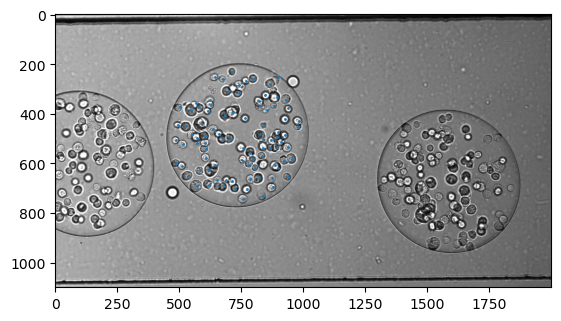

In [109]:
file_cells = 'data/generated/5-3-1.json'
with open(file_cells) as f:
    cells = json.load(f)

images = cv2.imreadmulti('data/sequences/5-3.tif')[1]
cell = cells['cell']
print(len(cell))
plt.imshow(images[0])
for c in cell:
    if len(c) == 0:
        continue
    c = np.array(c)
    plt.scatter(c[:,0],c[:,1], s=1)